# PROJECT: STUDENT PERFORMANCE DATASET (EDA)

##### IMPORTING NECESSARY LIBRARIES

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###### LOADING THE DATASET

In [11]:
df=pd.read_csv("student performance.csv")

###### VISUALIZING FIRST 5 ROWS

In [12]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [86]:
###### Gender: Gender of the student (male/female)
###### EthnicGroup: Ethnic group of the student (group A to E)
###### ParentEduc: Parent(s) education background (from some_highschool to master's degree)
###### LunchType: School lunch type (standard or free/reduced)
###### TestPrep: Test preparation course followed (completed or none)
###### ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
###### PracticeSport: How often the student parctice sport (never/sometimes/regularly))
###### IsFirstChild: If the child is first child in the family or not (yes/no)
###### NrSiblings: Number of siblings the student has (0 to 7)
###### TransportMeans: Means of transport to school (schoolbus/private)
###### WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
###### MathScore: math test score(0-100)
###### ReadingScore: reading test score(0-100)
###### WritingScore: writing test score(0-100)

###### INFORMATION ABOUT THE DATASET

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


###### DROPPING THE UNNAMED UNNECESSARY COLUMN

In [16]:
df=df.drop(columns="Unnamed: 0", axis=1)

In [17]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


###### VISUALIZING THE NULL VALUES

In [18]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

###### CHECKING IF THERE IS ANY DUPLICATED VALUES

In [20]:
df.duplicated().sum()

0

###### FILLING THE NULL VALUES WITH THEIR MODE VALUES

In [22]:
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             30641 non-null  object 
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  object 
 7   IsFirstChild         30641 non-null  object 
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  object 
 10  WklyStudyHours       30641 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


###### VISUALISING THE CLASS IN GENDER COLUMN

In [24]:
df["Gender"].value_counts()

Gender
female    15424
male      15217
Name: count, dtype: int64

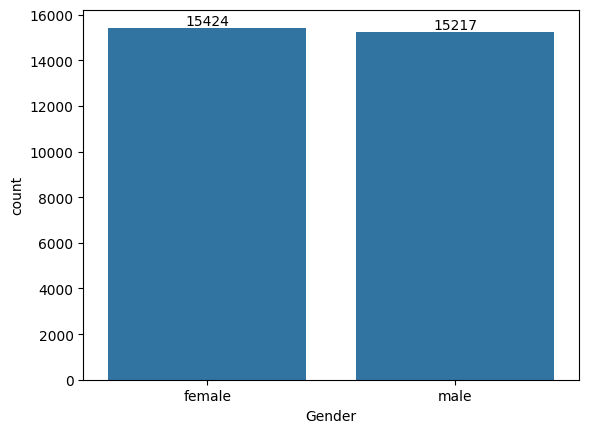

In [26]:
gender=sns.countplot(data=df, x="Gender")
gender.bar_label(gender.containers[0])
plt.show()

###### VISUALISING THE DISTRIBUTION OF ETHNIC GROUP

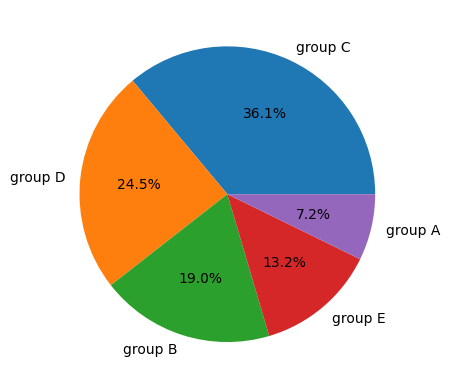

In [30]:
plt.pie(df["EthnicGroup"].value_counts(), labels=df["EthnicGroup"].value_counts().index, autopct='%1.1f%%')
plt.show()

###### CHECKING THE RELATION OF MEAN OF MATH SCORE, READING SCORE, WRITING SCORE WITH THE DIFFERENT CLASSES OF PARENTS EDUCATION DEGREE.

In [31]:
parents_edu=df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})

In [32]:
parents_edu

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.445978,69.189667,68.456711
some high school,62.584013,65.510785,63.632409


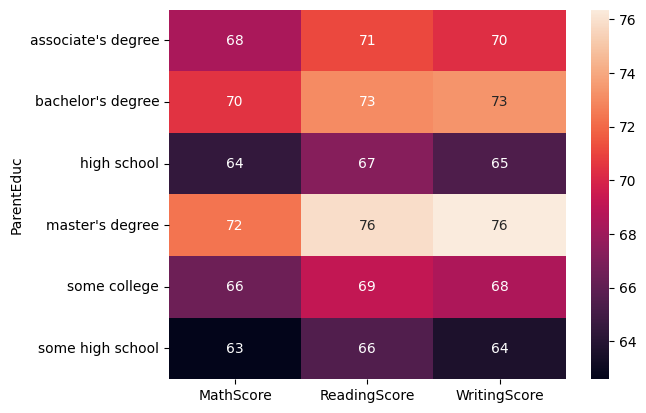

In [53]:
sns.heatmap(parents_edu, annot=True)
plt.show()

###### VISUALISING THE CLASS NUMBERS OF LUNCHTYPE

In [35]:
df["LunchType"].value_counts()

LunchType
standard        19905
free/reduced    10736
Name: count, dtype: int64

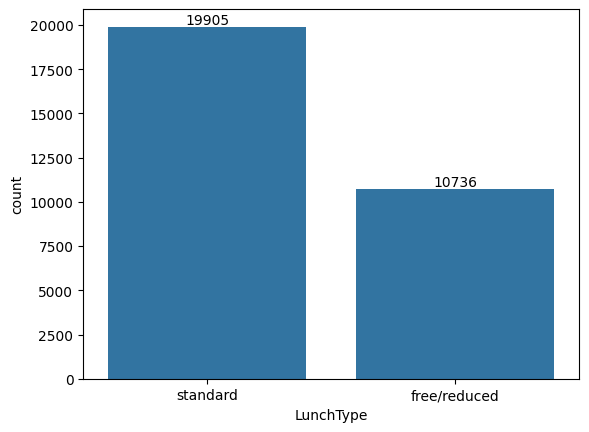

In [36]:
lunch_type=sns.countplot(data=df, x="LunchType")
lunch_type.bar_label(lunch_type.containers[0])
plt.show()

###### VISUALISING THE CLASS NUMBERS OF TEST PREPARATION

In [39]:
df["TestPrep"].value_counts()

TestPrep
none         20686
completed     9955
Name: count, dtype: int64

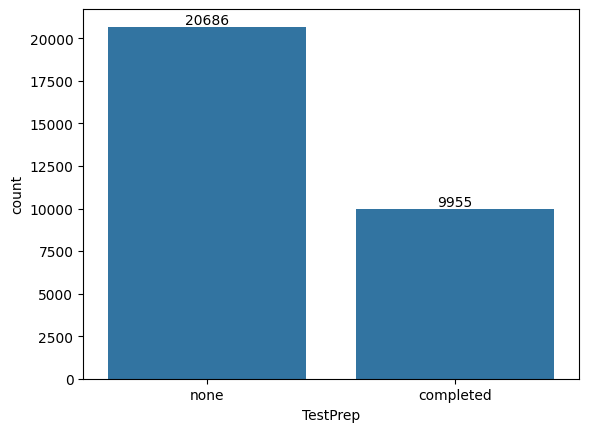

In [54]:
testprep=sns.countplot(data=df, x="TestPrep")
testprep.bar_label(testprep.containers[0])
plt.show()

###### CHECKING THE RELATION OF MEAN OF MATH SCORE, READING SCORE, WRITING SCORE WITH THE DIFFERENT CLASSES OF PARENTS MARITAL STATUS.

In [42]:
parents_marital_status=df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})

In [43]:
parents_marital_status

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


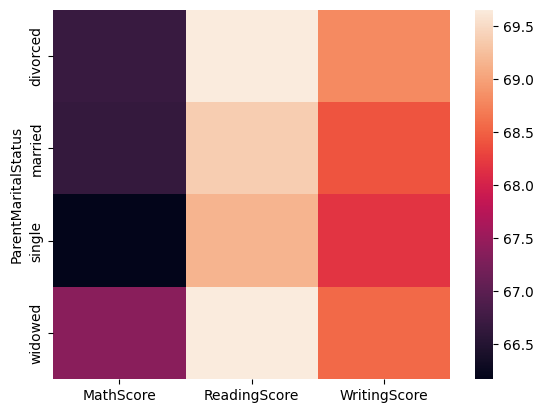

In [45]:
sns.heatmap(parents_marital_status)
plt.show()

###### CHECKING THE RELATION OF MEAN OF MATH SCORE, READING SCORE, WRITING SCORE WITH THE STUDENTS WHO PRACTICE SPORTS.

In [46]:
sports=df.groupby("PracticeSport").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})

In [47]:
sports

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255


###### CHECKING THE RELATION OF MEAN OF MATH SCORE, READING SCORE, WRITING SCORE WITH THE FIRST CHILD STATUS.

In [48]:
first_child=df.groupby("IsFirstChild").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'})

In [50]:
first_child

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.724507,69.508106,68.529371


###### CHANGING THE DATATYPE OF NO. OF SIBLINGS TO INTEGER TYPE INSTEAD OF FLOAT.

In [51]:
df["NrSiblings"]=df["NrSiblings"].astype("int")

###### CHECKING THE STATISTICAL DATA OF NUMERICAL COLUMN

In [52]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.087106,66.558402,69.377533,68.418622
std,1.442665,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


###### VISUALISING THE CLASS NUMBERS OF TRANSPORTATION MEANS

In [55]:
df["TransportMeans"].value_counts()

TransportMeans
school_bus    19279
private       11362
Name: count, dtype: int64

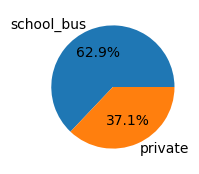

In [56]:
plt.figure(figsize=(4,2))
plt.pie(df["TransportMeans"].value_counts(), labels=df["TransportMeans"].value_counts().index, autopct="%1.1f%%")
plt.show()

###### VISUALISING THE DISTRIBUTION OF WEEKLY STUDY HOURS OF A STUDENT

In [57]:
df["WklyStudyHours"].value_counts()

WklyStudyHours
5 - 10    17201
< 5        8238
> 10       5202
Name: count, dtype: int64

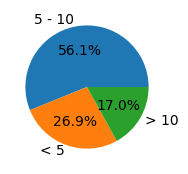

In [58]:
plt.figure(figsize=(4,2))
plt.pie(df["WklyStudyHours"].value_counts(), labels=df["WklyStudyHours"].value_counts().index, autopct="%1.1f%%")
plt.show()

###### VISUALIZING THE OUTIERS OF MATHS SCORE, READING SCORE, AND WRITING SCORE

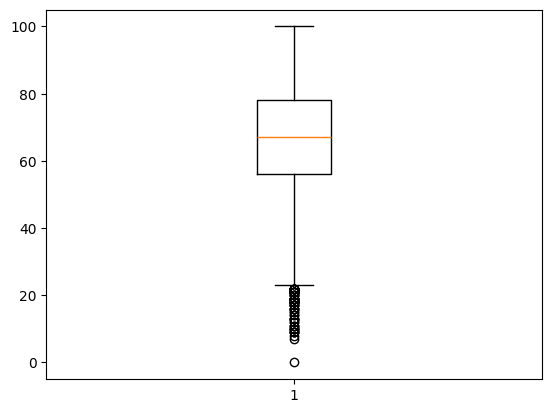

In [61]:
plt.boxplot(df["MathScore"])
plt.show()

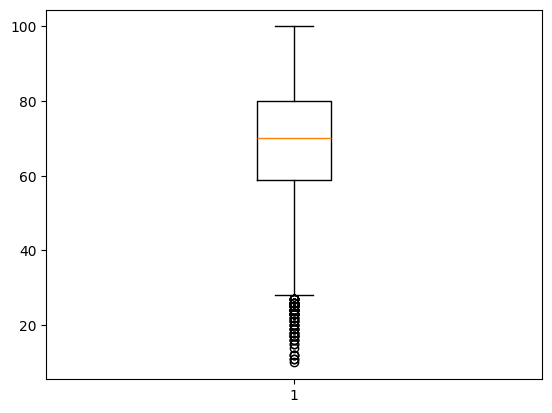

In [62]:
plt.boxplot(df["ReadingScore"])
plt.show()

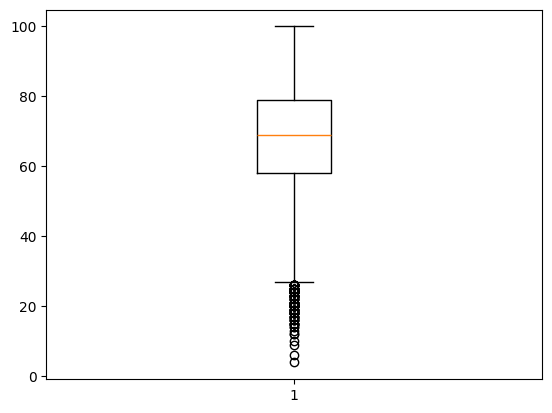

In [63]:
plt.boxplot(df["WritingScore"])
plt.show()

###### VISUALISING THE RELATION BETWEEN MATHS_SCORE, READING_SCORE, WRITING_SCORE WITH ETHNIC GROUP

In [67]:
x=df.groupby('EthnicGroup')['MathScore'].mean().sort_values()

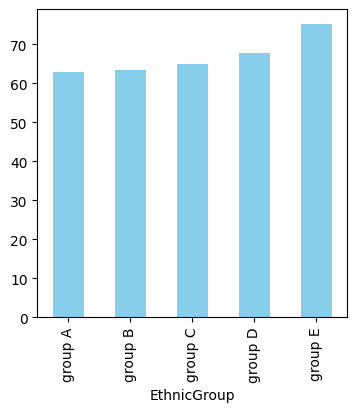

In [76]:
plt.figure(figsize=(4, 4))
x.plot(kind='bar', color='skyblue')
plt.show()

In [69]:
y=df.groupby('EthnicGroup')['ReadingScore'].mean().sort_values()

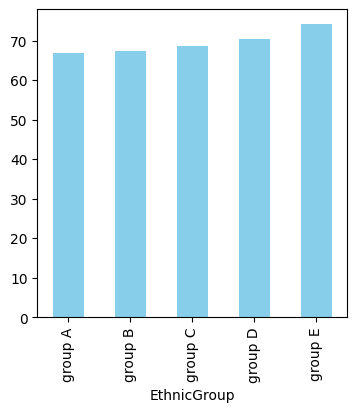

In [77]:
plt.figure(figsize=(4, 4))
y.plot(kind='bar', color='skyblue')
plt.show()

In [73]:
z=df.groupby('EthnicGroup')['WritingScore'].mean().sort_values()

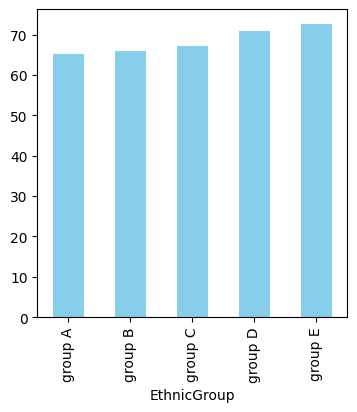

In [78]:
plt.figure(figsize=(4, 4))
z.plot(kind='bar', color='skyblue')
plt.show()

###### VISUALISING THE RELATION BETWEEN MATHS_SCORE, READING_SCORE, WRITING_SCORE WITH TEST PREPARATION

In [82]:
a=df.groupby('TestPrep')['MathScore'].mean().sort_values()
b=df.groupby('TestPrep')['ReadingScore'].mean().sort_values()
c=df.groupby('TestPrep')['WritingScore'].mean().sort_values()

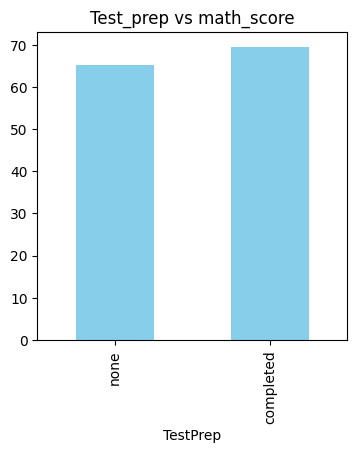

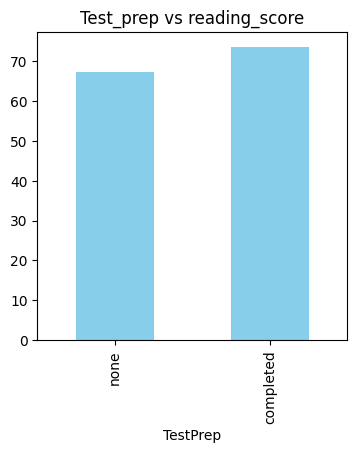

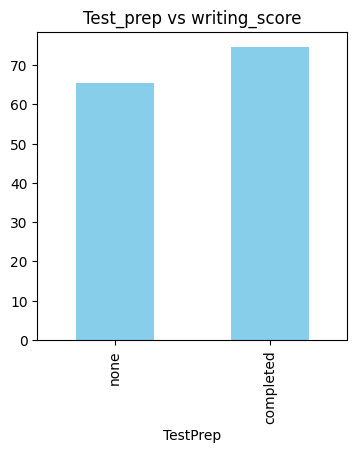

In [85]:
plt.figure(figsize=(4, 4))
a.plot(kind='bar', color='skyblue')
plt.title("Test_prep vs math_score")
plt.show()

plt.figure(figsize=(4, 4))
b.plot(kind='bar', color='skyblue')
plt.title("Test_prep vs reading_score")
plt.show()

plt.figure(figsize=(4, 4))
c.plot(kind='bar', color='skyblue')
plt.title("Test_prep vs writing_score")
plt.show()